<a href="https://colab.research.google.com/github/Lourdes-Tolotto/ML/blob/main/TP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd


In [ ]:
df_boston = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
print(df_boston.head())
print()
df_boston.info()
print()

df = df_boston.dropna()
target = df['MEDV']
features = df.drop(columns='MEDV')



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float

In [ ]:
from scipy.stats import normaltest

# Se analiza un conjunto de datos para determinar si tienen distribucion normal

def print_hist(data, data_name, ax):
    
    # Con este criterio se asume que los datos tienen una distribucion normal
    # si p_value>0.5
    stat, p_value = normaltest(data)
    
    if p_value > 0.05: 
      normal = True
      sns.histplot(data, kde=True, ax=ax, color='green')
      ax.set_title(data_name + ' (Posee D. Normal)')
    else: 
      normal = False
      sns.histplot(data, kde=True, ax=ax, color='red')
      ax.set_title(data_name + ' (NO Posee D. Normal)')
    
    return normal
    

In [ ]:
# Imprime cada feature del dataset informando si tiene distribucion normal o no

def DF_analysis(df, fig_fils, fig_cols):
    
    features = df.columns
    fig, axes = plt.subplots(fig_fils, fig_cols, figsize=(25,30))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    axes = axes.ravel()

    count = 0

    """for feature, ax in zip(features, axes):
        if feature != avoid_name :
          if print_hist(df[feature], feature, ax)==True : count = count + 1
    """
    for feature, ax in zip(features, axes):
        if print_hist(df[feature], feature, ax)==True : count = count + 1

    print("Features con distribución normal: ",count)

    fig.suptitle('Analisis de cada feature')
    plt.show()

Features con distribución normal:  0


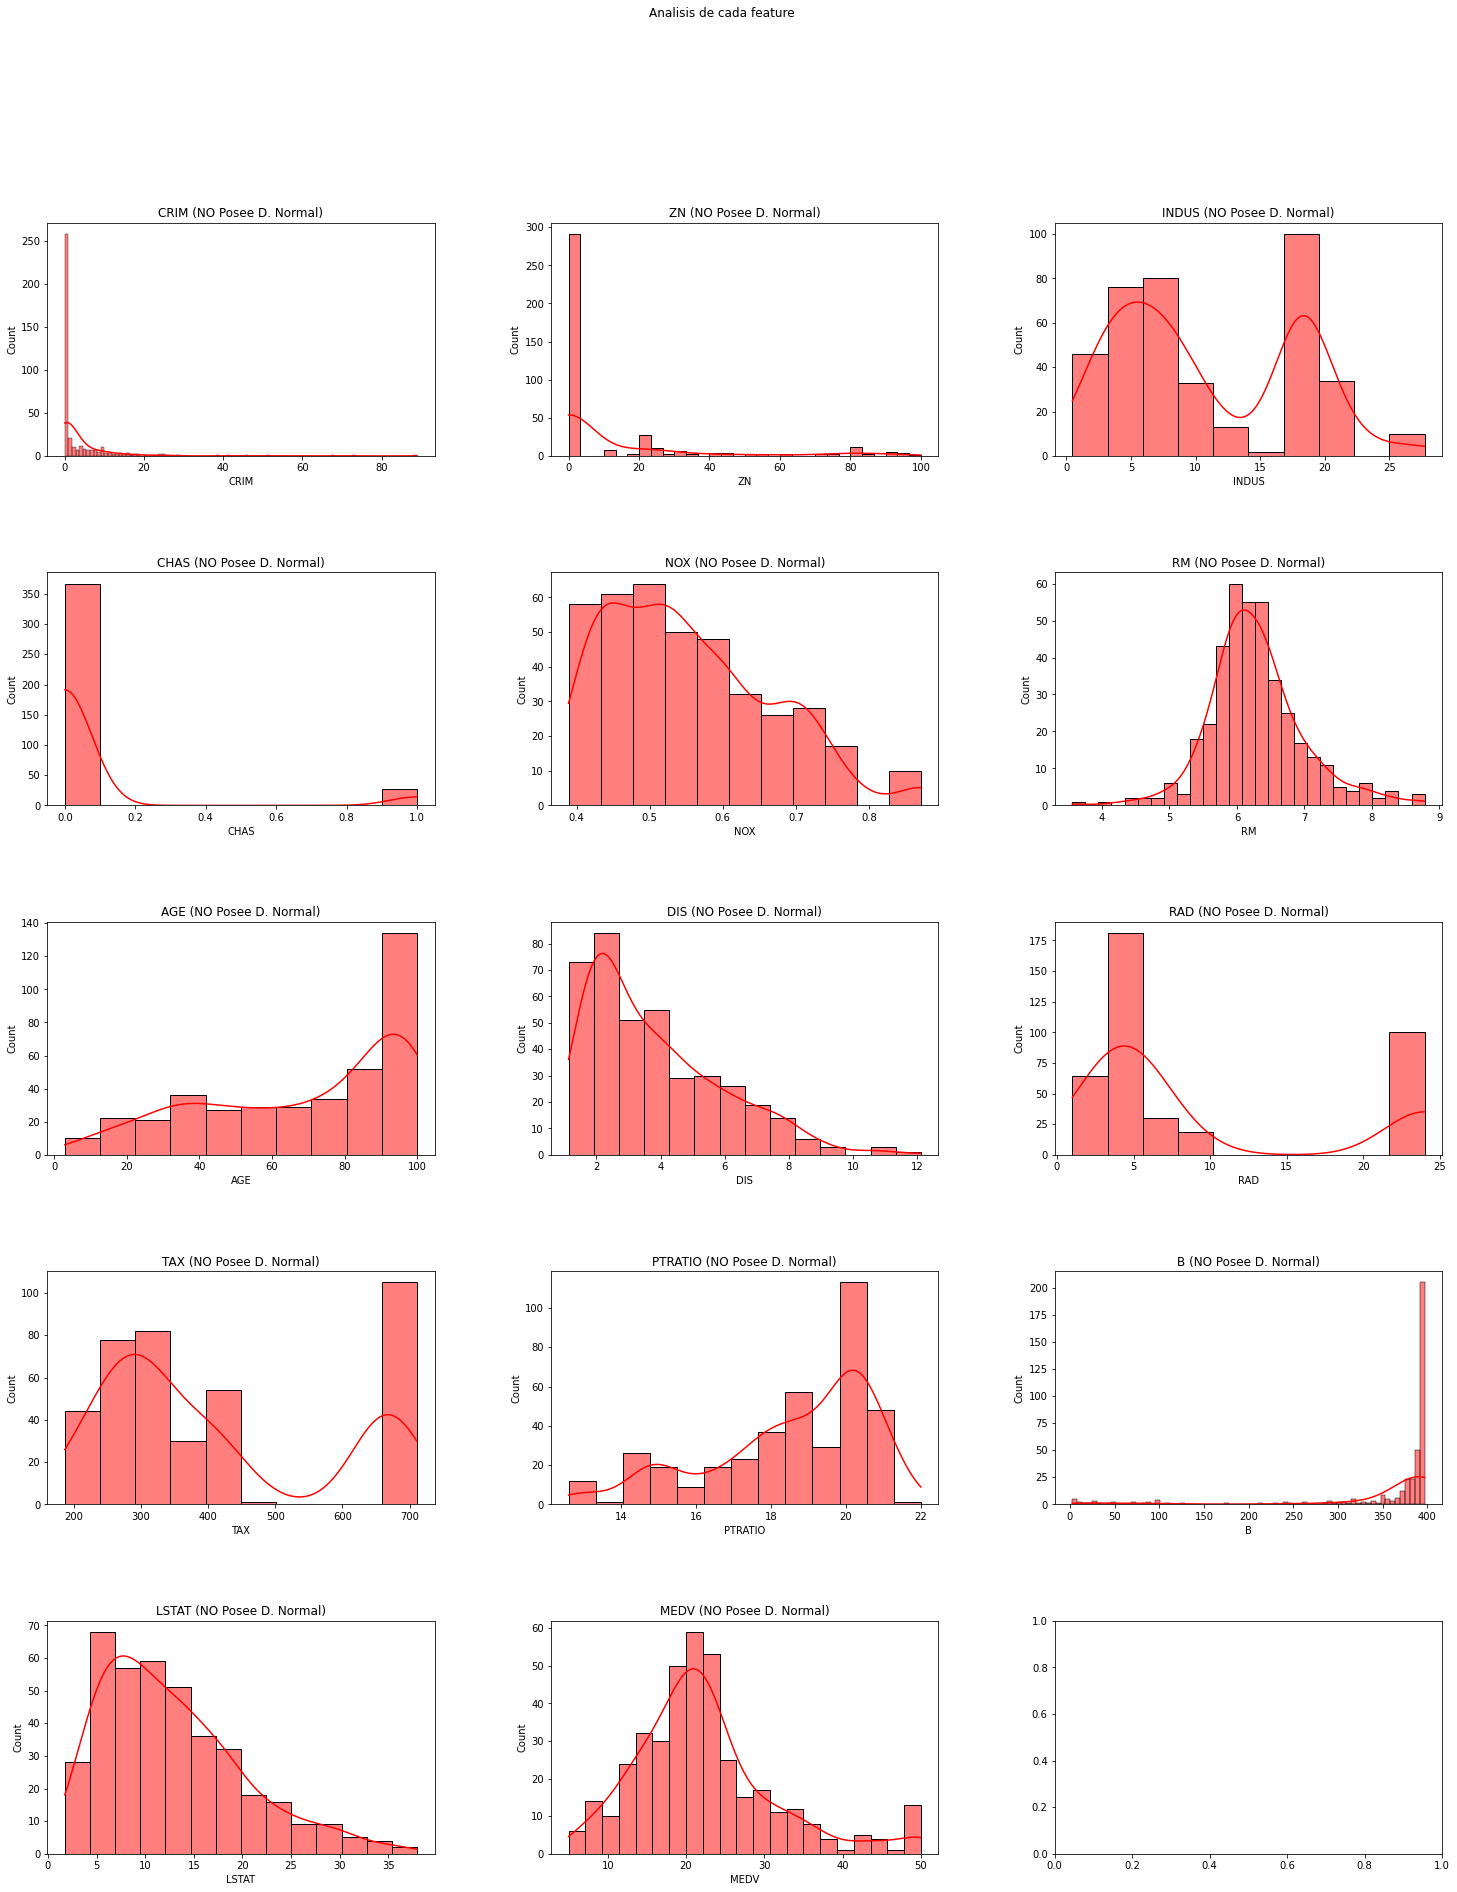

In [ ]:
DF_analysis(df,5,3)

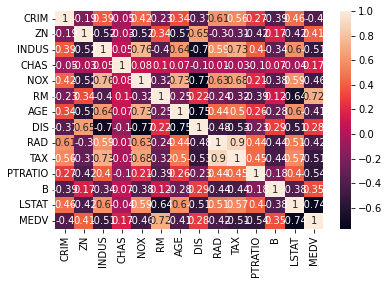

In [ ]:
# Matriz de correlacion de los datos

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
sns.set(rc={"figure.figsize":(20,12)})

**REGRESIÓN LINEAR**

In [ ]:
# En base a la matriz se eligen los features que mayor 
# correlacion tienen con el target para entrenar el modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features2 = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])

X_train, X_test, Y_train, Y_test = train_test_split(features, target, 
                                      test_size = 0.3, random_state=0)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(features2, target, 
                                      test_size = 0.3, random_state=0)
model_lin = LinearRegression()

print('USANDO EL DATASET ORIGINAL')
print('------------------------------------------------')
print()

model_lin.fit(X_train, Y_train)

y_train_predict = model_lin.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('RMSE para training: ', rmse)
print('R2 score para trainging: ', r2)
print()

y_test_predict = model_lin.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE para test: ', rmse)
print('R2 score para test: ', r2)
print()
print()

#########################################################################

print('USANDO FEATURES MAS RELEVANTES')
print('------------------------------------------------')

model_lin.fit(X_train2, Y_train2)

y_train_predict = model_lin.predict(X_train2)
rmse = (np.sqrt(mean_squared_error(Y_train2, y_train_predict)))
r2 = r2_score(Y_train2, y_train_predict)


print('RMSE para training: ', rmse)
print('R2 score para trainging: ', r2)
print()

y_test_predict = model_lin.predict(X_test2)
rmse = (np.sqrt(mean_squared_error(Y_test2, y_test_predict)))
r2 = r2_score(Y_test2, y_test_predict)

print('RMSE para test: ', rmse)
print('R2 score para test: ', r2)
print()


USANDO EL DATASET ORIGINAL
------------------------------------------------

RMSE para training:  4.231554820897814
R2 score para trainging:  0.7927657852108867

RMSE para test:  4.88717941798676
R2 score para test:  0.687341164461565


USANDO FEATURES MAS RELEVANTES
------------------------------------------------
RMSE para training:  5.289549884994204
R2 score para trainging:  0.6761835173351991

RMSE para test:  5.490826446623765
R2 score para test:  0.6053341278097533



**GRADIENTBOOSTING REGRESSOR**

Valor óptimo de estimators:  201
Valor óptimo de estimators:  201
Valor óptimo de estimators:  51
Valor óptimo de estimators:  51



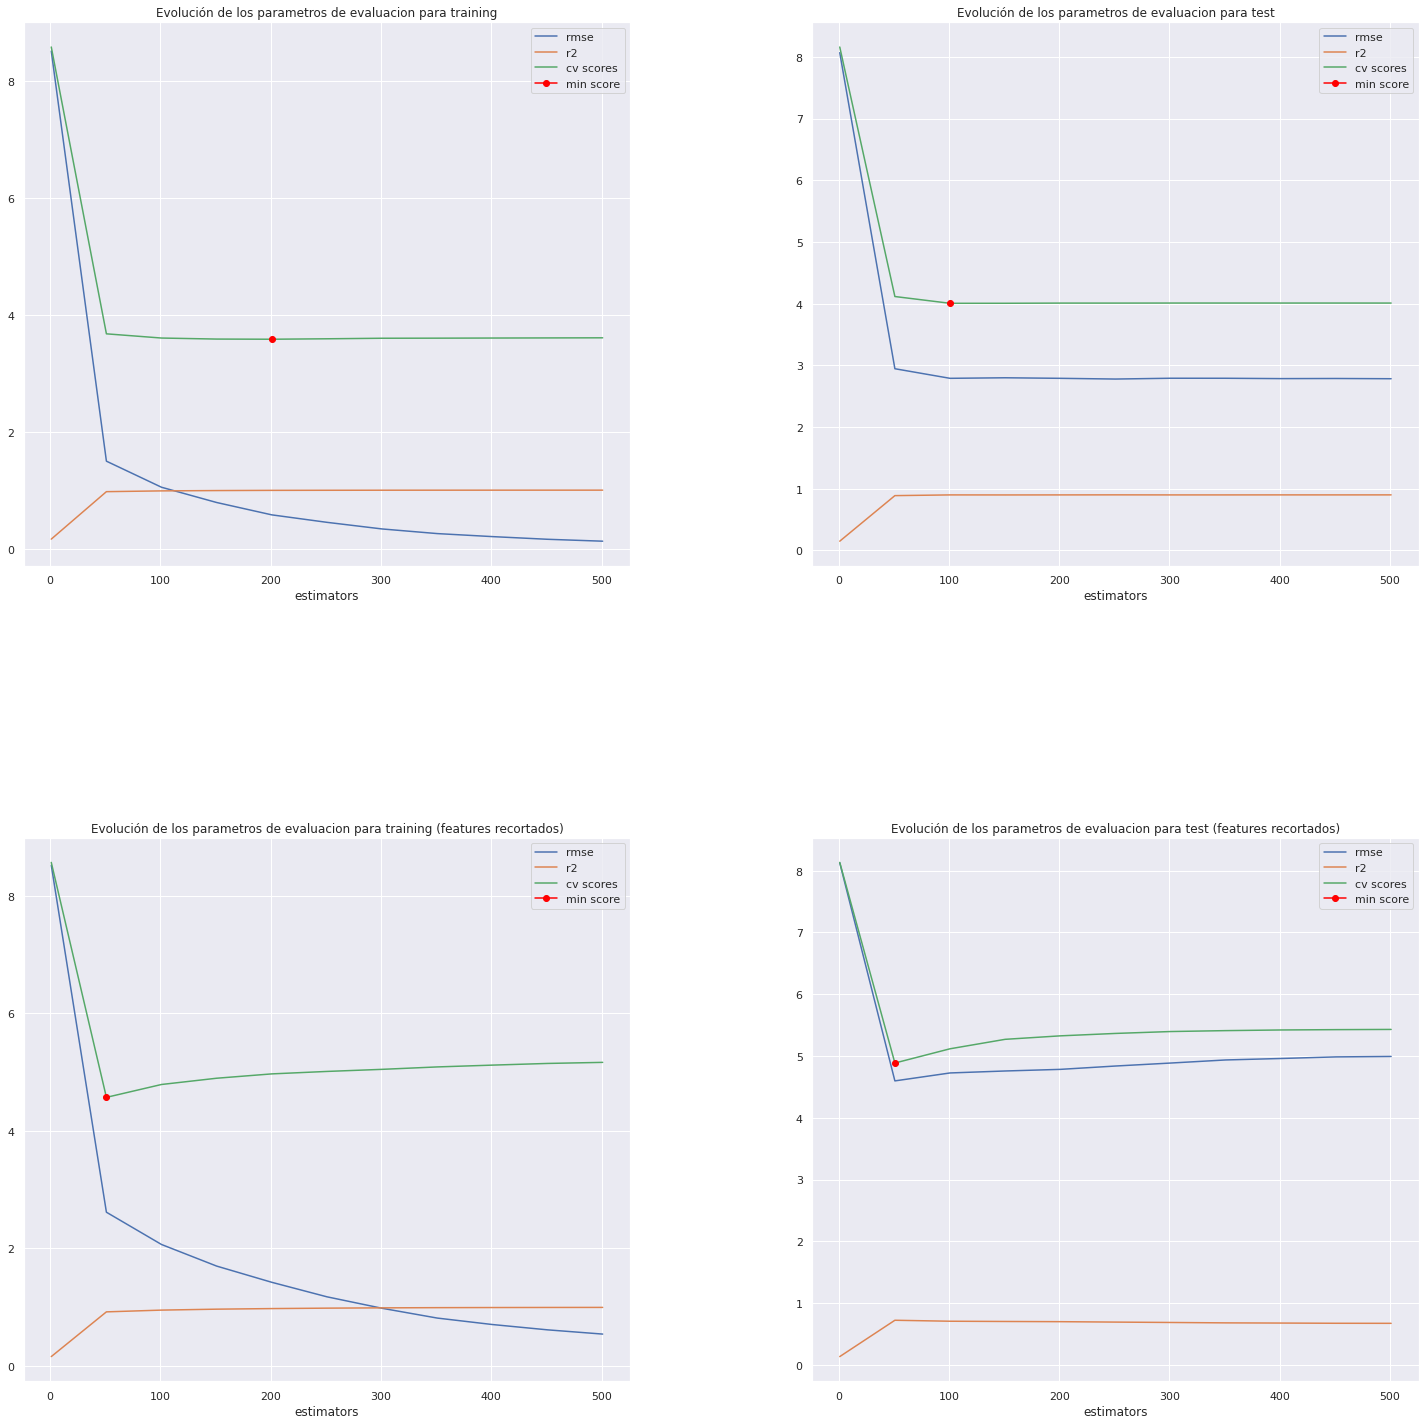

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import multiprocessing

rmse_train = []
r2_train = []
rmse_test = []
r2_test = []
score_train = []
score_test = []

rmse_train2 = []
r2_train2 = []
rmse_test2 = []
r2_test2 = []
score_train2 = []
score_test2 = []

estimators = range(1,550,50)
for n in estimators:

  model_grad = GradientBoostingRegressor(n_estimators = n,
                random_state = 0, learning_rate= 0.1)
  
  model_grad.fit(X_train, Y_train)

  y_train_predict = model_grad.predict(X_train)
  rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
  rmse_train.append(rmse)
  r2 = r2_score(Y_train, y_train_predict)
  r2_train.append(r2)

  score = cross_val_score(estimator = model_grad, X = X_train, 
                y = Y_train, scoring = 'neg_root_mean_squared_error', 
                cv = 5).mean()
  score_train.append(-1*score)
    

  y_test_predict = model_grad.predict(X_test)
  rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  rmse_test.append(rmse)
  r2 = r2_score(Y_test, y_test_predict)
  r2_test.append(r2)

  score = cross_val_score(estimator = model_grad, X = X_test, 
                y = Y_test, scoring = 'neg_root_mean_squared_error', cv = 5,
                n_jobs = multiprocessing.cpu_count() - 1).mean()
  score_test.append(-1*score)

################################################################################
  
  model_grad.fit(X_train2, Y_train2)

  y_train_predict = model_grad.predict(X_train2)
  rmse = np.sqrt(mean_squared_error(Y_train2, y_train_predict))
  rmse_train2.append(rmse)
  r2 = r2_score(Y_train2, y_train_predict)
  r2_train2.append(r2)

  score = cross_val_score(estimator = model_grad, X = X_train2, 
                y = Y_train2, scoring = 'neg_root_mean_squared_error', 
                cv = 5).mean()
  score_train2.append(-1*score)
    

  y_test_predict = model_grad.predict(X_test2)
  rmse = np.sqrt(mean_squared_error(Y_test2, y_test_predict))
  rmse_test2.append(rmse)
  r2 = r2_score(Y_test2, y_test_predict)
  r2_test2.append(r2)

  score = cross_val_score(estimator = model_grad, X = X_test2, 
                y = Y_test2, scoring = 'neg_root_mean_squared_error', cv = 5,
                n_jobs = multiprocessing.cpu_count() - 1).mean()
  score_test2.append(-1*score)


fig, axes = plt.subplots(2, 2, figsize=(25,25))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
#axes = axes.ravel()


axes[0,0].plot(estimators, rmse_train, label="rmse")
axes[0,0].plot(estimators, r2_train, label="r2")
axes[0,0].plot(estimators, score_train, label="cv scores")
axes[0,0].plot(estimators[np.argmin(score_train)], min(score_train),
        marker='o', color = "red", label="min score")
axes[0,0].set_xlabel("estimators")
axes[0,0].set_title("Evolución de los parametros de evaluacion para training")
axes[0,0].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train)])

axes[0,1].plot(estimators, rmse_test, label="rmse")
axes[0,1].plot(estimators, r2_test, label="r2")
axes[0,1].plot(estimators, score_test, label="cv scores")
axes[0,1].plot(estimators[np.argmin(score_test)], min(score_test),
        marker='o', color = "red", label="min score")
axes[0,1].set_xlabel("estimators")
axes[0,1].set_title("Evolución de los parametros de evaluacion para test")
axes[0,1].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train)])


axes[1,0].plot(estimators, rmse_train2, label="rmse")
axes[1,0].plot(estimators, r2_train2, label="r2")
axes[1,0].plot(estimators, score_train2, label="cv scores")
axes[1,0].plot(estimators[np.argmin(score_train2)], min(score_train2),
        marker='o', color = "red", label="min score")
axes[1,0].set_xlabel("estimators")
axes[1,0].set_title("Evolución de los parametros de evaluacion para training (features recortados)")
axes[1,0].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train2)])

axes[1,1].plot(estimators, rmse_test2, label="rmse")
axes[1,1].plot(estimators, r2_test2, label="r2")
axes[1,1].plot(estimators, score_test2, label="cv scores")
axes[1,1].plot(estimators[np.argmin(score_test2)], min(score_test2),
        marker='o', color = "red", label="min score")
axes[1,1].set_xlabel("estimators")
axes[1,1].set_title("Evolución de los parametros de evaluacion para test (features recortados)")
axes[1,1].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train2)])
print()

**XGBOOST REGRESSOR**

Valor óptimo de estimators:  201
Valor óptimo de estimators:  201
Valor óptimo de estimators:  51
Valor óptimo de estimators:  51



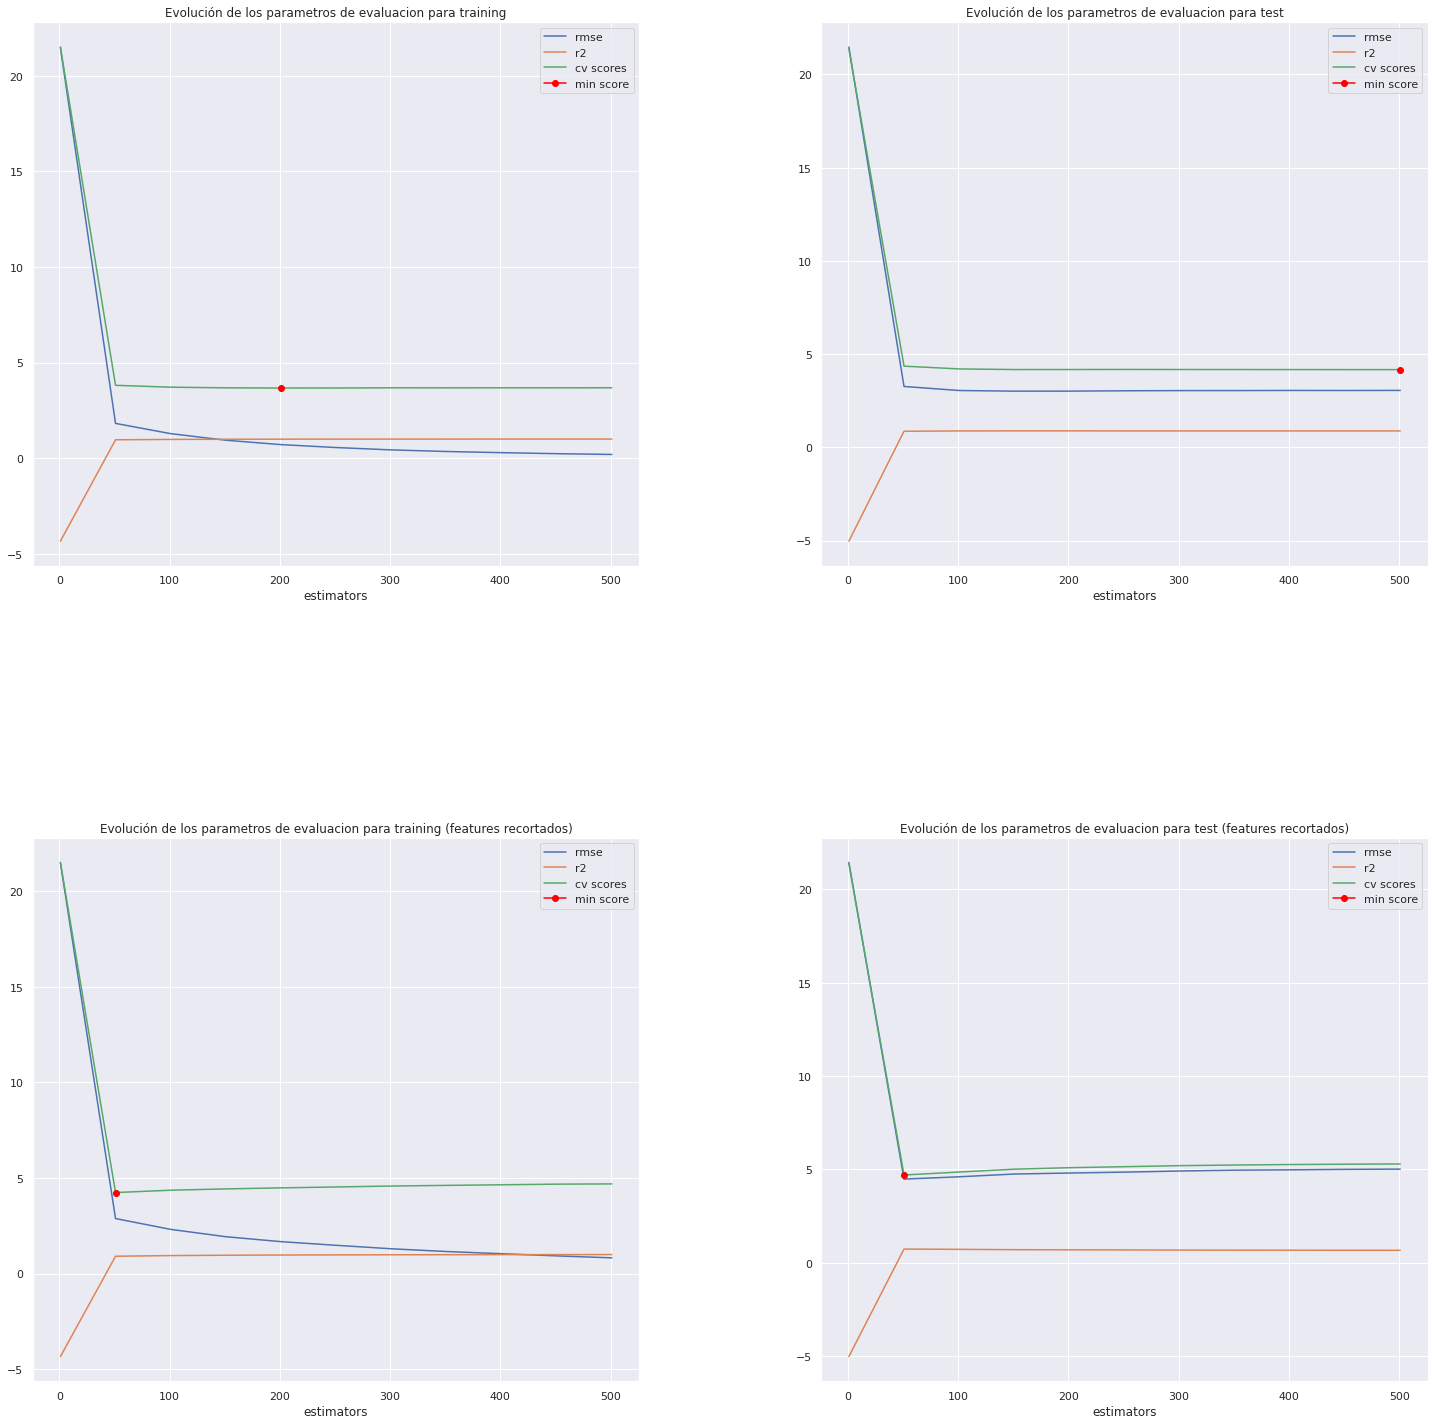

In [ ]:
import xgboost as xg

rmse_train = []
r2_train = []
rmse_test = []
r2_test = []
score_train = []
score_test = []

rmse_train2 = []
r2_train2 = []
rmse_test2 = []
r2_test2 = []
score_train2 = []
score_test2 = []

estimators = range(1,550,50)
for n in estimators:

  model_xgb =xg.XGBRegressor(n_estimators = n, random_state = 0,
                             objective ="reg:squarederror")
  
  model_xgb.fit(X_train, Y_train)

  y_train_predict = model_xgb.predict(X_train)
  rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
  rmse_train.append(rmse)
  r2 = r2_score(Y_train, y_train_predict)
  r2_train.append(r2)

  score = cross_val_score(estimator = model_xgb, X = X_train, 
                y = Y_train, scoring = 'neg_root_mean_squared_error', 
                cv = 5).mean()
  score_train.append(-1*score)
    

  y_test_predict = model_xgb.predict(X_test)
  rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  rmse_test.append(rmse)
  r2 = r2_score(Y_test, y_test_predict)
  r2_test.append(r2)

  score = cross_val_score(estimator = model_xgb, X = X_test, 
                y = Y_test, scoring = 'neg_root_mean_squared_error', cv = 5,
                n_jobs = multiprocessing.cpu_count() - 1).mean()
  score_test.append(-1*score)

################################################################################
  
  model_xgb.fit(X_train2, Y_train2)

  y_train_predict = model_xgb.predict(X_train2)
  rmse = np.sqrt(mean_squared_error(Y_train2, y_train_predict))
  rmse_train2.append(rmse)
  r2 = r2_score(Y_train2, y_train_predict)
  r2_train2.append(r2)

  score = cross_val_score(estimator = model_xgb, X = X_train2, 
                y = Y_train2, scoring = 'neg_root_mean_squared_error', 
                cv = 5).mean()
  score_train2.append(-1*score)
    

  y_test_predict = model_xgb.predict(X_test2)
  rmse = np.sqrt(mean_squared_error(Y_test2, y_test_predict))
  rmse_test2.append(rmse)
  r2 = r2_score(Y_test2, y_test_predict)
  r2_test2.append(r2)

  score = cross_val_score(estimator = model_xgb, X = X_test2, 
                y = Y_test2, scoring = 'neg_root_mean_squared_error', cv = 5,
                n_jobs = multiprocessing.cpu_count() - 1).mean()
  score_test2.append(-1*score)

# Plot

fig, axes = plt.subplots(2, 2, figsize=(25,25))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

axes[0,0].plot(estimators, rmse_train, label="rmse")
axes[0,0].plot(estimators, r2_train, label="r2")
axes[0,0].plot(estimators, score_train, label="cv scores")
axes[0,0].plot(estimators[np.argmin(score_train)], min(score_train),
        marker='o', color = "red", label="min score")
axes[0,0].set_xlabel("estimators")
axes[0,0].set_title("Evolución de los parametros de evaluacion para training")
axes[0,0].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train)])

axes[0,1].plot(estimators, rmse_test, label="rmse")
axes[0,1].plot(estimators, r2_test, label="r2")
axes[0,1].plot(estimators, score_test, label="cv scores")
axes[0,1].plot(estimators[np.argmin(score_test)], min(score_test),
        marker='o', color = "red", label="min score")
axes[0,1].set_xlabel("estimators")
axes[0,1].set_title("Evolución de los parametros de evaluacion para test")
axes[0,1].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train)])


axes[1,0].plot(estimators, rmse_train2, label="rmse")
axes[1,0].plot(estimators, r2_train2, label="r2")
axes[1,0].plot(estimators, score_train2, label="cv scores")
axes[1,0].plot(estimators[np.argmin(score_train2)], min(score_train2),
        marker='o', color = "red", label="min score")
axes[1,0].set_xlabel("estimators")
axes[1,0].set_title("Evolución de los parametros de evaluacion para training (features recortados)")
axes[1,0].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train2)])

axes[1,1].plot(estimators, rmse_test2, label="rmse")
axes[1,1].plot(estimators, r2_test2, label="r2")
axes[1,1].plot(estimators, score_test2, label="cv scores")
axes[1,1].plot(estimators[np.argmin(score_test2)], min(score_test2),
        marker='o', color = "red", label="min score")
axes[1,1].set_xlabel("estimators")
axes[1,1].set_title("Evolución de los parametros de evaluacion para test (features recortados)")
axes[1,1].legend();
print("Valor óptimo de estimators: ", estimators[np.argmin(score_train2)])
print()
